In [99]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

---

## I. Ask
1. Thống kê các thông tin chung như số lượng quan sát, các giá trị duy nhất trong từng cột, độ lệch chuẩn... 
2. Phân tích doanh số bán hàng video game theo thời gian, hãng sản xuất, thể loại, nền tảng. 
3. Tìm ra các thể loại và nền tảng video game phổ biến nhất. 
4. So sánh doanh số bán hàng của các hãng sản xuất lớn. 
5. Tìm ra xu hướng doanh số bán hàng video game qua các năm. 


---

## II. Prepare
Sử dụng file 'vgsales.csv' để phân tích

In [100]:
dataframe = pd.read_csv('vgsales.csv')

---

## III. Process

### 1. Overview of data frame

In [101]:
dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.00,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.00,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [102]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Nhận xét: Không có giá trị Null trong Data Frame

In [103]:
dataframe_sorted = dataframe.sort_values('Year')
dataframe_sorted

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.00,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2671,Boxing,2600,1980.00,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5366,5368,Freeway,2600,1980.00,Action,Activision,0.32,0.02,0.00,0.00,0.34
1969,1971,Defender,2600,1980.00,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980.00,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


Nhận xét: Trong trường Year có 1 vài game không có năm phát hành (N/A) --> Loại bỏ những game này

In [104]:
dataframe['Year'] = dataframe['Year'].astype(str)

In [105]:
# Eliminate N/A Values
dataframe = dataframe[(dataframe['Year'] != 'NaN') & (dataframe['Year'] != 'nan')]

In [106]:
# Recheck
dataframe_sorted = dataframe.sort_values('Year')
dataframe_sorted

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
4820,4822,EA Sports UFC 2,XOne,2016.0,Sports,Electronic Arts,0.23,0.14,0.00,0.04,0.40
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [107]:
# Convert "Year" field from string to integer
def convert_to_int(x):
    split_value = x.split('.')
    result = int(split_value[0])
    return result

dataframe['Year'] = dataframe['Year'].apply(convert_to_int)

In [108]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [109]:
# Recheck
dataframe_sorted = dataframe.sort_values('Year')
dataframe_sorted

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5366,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
1969,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
4820,4822,EA Sports UFC 2,XOne,2016,Sports,Electronic Arts,0.23,0.14,0.00,0.04,0.40
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


### 2. Data Exploration
a) Xác định các records trùng lặp

In [110]:
dataframe[dataframe.duplicated()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Nhận xét: Dataframe không có chứa các records trùng lặp

b) Data Summary

In [111]:
dataframe.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.00,16327.00,16327.00,16327.00,16327.00,16327.00,16327.00
mean,8292.87,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.67,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4136.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8295.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12441.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


Nhận xét:
- Có 16.598 records
- Giá trị Rank nhỏ nhất là 1 và lớn nhất là 16.600 --> Có 2 giá trị bị thiếu hoặc đánh Index sai 
- Việc đánh Index sai này không ảnh hưởng nhiều đến kết quả phân tích --> Không cần sửa lại
- Năm phát hành game từ 1980 đến 2020

#### Check Platform Names

In [112]:
sorted(dataframe["Platform"].unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Nhận xét: Tên các hệ máy được viết tắt --> Sửa đổi lại thành tên đầy đủ

In [113]:
## Tạo 1 trường mới "Game Console" để thao tác replace tên
dataframe['Game Console'] = dataframe['Platform']

In [114]:
dataframe['Game Console'] = dataframe['Game Console'].replace(
    {'2600': 'Atari 2600', 
     'SAT': 'Sega Saturn', 
     '3DO': '3DO Interactive Multiplayer', 
     '3DS': 'Nintendo 3DS', 
     'DC': 'Sega Dreamcast', 
     'DS': 'Nintendo DS', 
     'GB': 'Game Boy', 
     'GBA': 'Game Boy Advance', 
     'GC': 'Nintendo GameCube', 
     'GEN': 'Sega Genesis', 
     'GG': 'Game Gear', 
     'N64': 'Nintendo 64', 
     'NES': 'Nintendo Entertainment System', 
     'NG': 'Neo Geo', 
     'PC': 'PC', 
     'PCFX': 'PC-FX', 
     'PS': 'PlayStation', 
     'PS2': 'PlayStation 2', 
     'PS3': 'PlayStation 3', 
     'PS4': 'PlayStation 4', 
     'PSP': 'PlayStation Portable', 
     'PSV': 'PlayStation Vita', 
     'SCD': 'Sega CD', 
     'SNES': 'Super Nintendo Entertainment System', 
     'TG16': 'TurboGrafx-16', 
     'Wii': 'Nintendo Wii', 
     'WiiU': 'Nintendo Wii U', 
     'WS': 'WonderSwan', 
     'X360': 'Xbox 360', 
     'XB': 'Xbox', 
     'XOne': 'Xbox One'})


In [115]:
dataframe.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Game Console
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo Wii
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo Entertainment System
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo Wii
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo Wii
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Game Boy


In [116]:
# Phân loại Game Console theo từng nhóm
Home_Console = ['2600', 'SAT', '3DO', 'DC', 'GB', 'GC', 'GEN', 'N64', 'NES', 'NG', 'PCFX', 
                'PS', 'PS2', 'PS3', 'PS4', 'SCD', 'SNES', 'TG16', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']
Handheld_Console = ['3DS', 'DS', 'GBA', 'GG', 'PSP', 'PSV', 'WS']
Microsoft_Windows = 'PC'

# Tạo trường "Category" chứa các nhóm tương ứng
def categorize_platform(x):
    if x in Home_Console:
        return 'Home Console'
    elif x in Handheld_Console:
        return 'Handheld Console'
    elif x in Microsoft_Windows:
        return 'Microsoft Windows (PC)'

dataframe['Category'] = dataframe['Platform'].apply(categorize_platform)

In [117]:
dataframe.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Game Console,Category
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo Wii,Home Console
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo Entertainment System,Home Console
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo Wii,Home Console
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo Wii,Home Console
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Game Boy,Home Console


In [118]:
## Tạo 1 trường mới "Game Console Publishers" chứa thông tin nhà phát hành hệ máy chơi game
dataframe['Game Console Publishers'] = dataframe['Platform']

In [119]:
dataframe['Game Console Publishers'] = dataframe['Game Console Publishers'].replace(
    {
    '2600': 'Atari',
    'SAT': 'Sega',
    '3DO': '3DO Company',
    '3DS': 'Nintendo',
    'DC': 'Sega',
    'DS': 'Nintendo',
    'GB': 'Nintendo',
    'GBA': 'Nintendo',
    'GC': 'Nintendo',
    'GEN': 'Sega',
    'GG': 'Sega',
    'N64': 'Nintendo',
    'NES': 'Nintendo',
    'NG': 'SNK',
    'PC': 'Microsoft Windows (PC)',
    'PCFX': 'NEC Corporation',
    'PS': 'Sony',
    'PS2': 'Sony',
    'PS3': 'Sony',
    'PS4': 'Sony',
    'PSP': 'Sony',
    'PSV': 'Sony',
    'SCD': 'Sega',
    'SNES': 'Nintendo',
    'TG16': 'NEC Corporation',
    'Wii': 'Nintendo',
    'WiiU': 'Nintendo',
    'WS': 'Bandai',
    'X360': 'Microsoft',
    'XB': 'Microsoft',
    'XOne': 'Microsoft'
})

In [120]:
dataframe.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Game Console,Category,Game Console Publishers
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo Wii,Home Console,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo Entertainment System,Home Console,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo Wii,Home Console,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo Wii,Home Console,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Game Boy,Home Console,Nintendo


In [121]:
## Tạo 1 trường mới "Publishers Group" chứa thông tin 4 nhà phát hành hệ máy chơi game lớn nhất
dataframe['Publisher Group'] = dataframe['Game Console Publishers']

In [122]:
dataframe['Publisher Group'] = dataframe['Publisher Group'].replace(
    {
    'Atari' : 'Others',
    'Sega' : 'Others',
    '3DO Company': 'Others',  
    'SNK' : 'Others',
    'NEC Corporation' : 'Others',
    'Bandai' : 'Others'
})

In [123]:
## Tạo 1 trường mới "Genre Group" chứa thông tin 6 thể loại game được yêu thích nhất
dataframe['Genre Group'] = dataframe['Genre']

In [124]:
dataframe['Genre Group'] = dataframe['Genre Group'].replace(
    {
    'Racing' : 'Others',
    'Platform' : 'Others',
    'Simulation': 'Others',  
    'Fighting' : 'Others',
    'Strategy' : 'Others',
    'Puzzle' : 'Others'
})

In [125]:
dataframe.to_csv('Video_Games_Sales.csv', index=False)

In [126]:
# Assign data frame to df
df = pd.read_csv('Video_Games_Sales.csv')

---
## IV. Analysis and Visualization
### 1. Analysis of the quantity rate of video games
#### a) The quantity rate of video games by Game Console Category

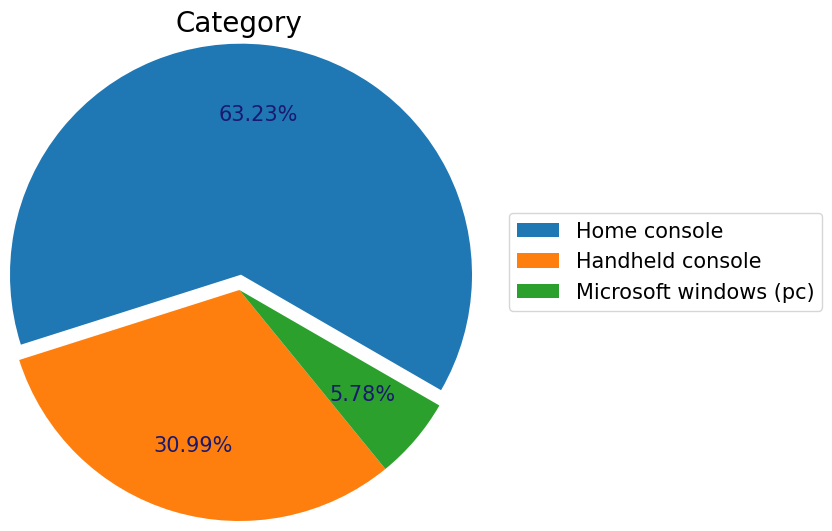

In [146]:
plt.figure(figsize = (5,5))
plt.pie(df['Category'].value_counts(), explode = (0.1,0,0),
        textprops = {'fontsize':15,'color':'midnightblue'},
        radius = 1.5, autopct = '%.2f%%', pctdistance = 0.7, startangle = -30)
plt.legend(df['Category'].value_counts().index.str.capitalize(), fontsize = 15,
           loc = 2, bbox_to_anchor = (1.2,0.7),borderaxespad = 0.)
plt.title("Category", y = 1.15, fontsize = 20)
plt.show()

Nhận xét:
- Dựa trên biểu đồ này, có thể thấy tỷ lệ sử dụng máy chơi game tại nhà chiếm tỷ trọng lớn nhất, khoảng 63.23%, tiếp theo là máy chơi game cầm tay với tỷ lệ khoảng 40%, cuối cùng là PC với tỷ lệ 5.78%.
- Lý giải cho hiện tượng này là từ những năm 80 và 90, máy tính cá nhân (PC) được phát triển chủ yếu để đáp ứng nhu cầu công việc với yêu cầu kỹ thuật cao. Điều này dẫn đến việc các nhà sản xuất thiết bị chơi game đã tập trung vào việc tạo ra các máy chơi game cầm tay và máy chơi game tại nhà với thiết kế đơn giản và dễ sử dụng, nhằm đáp ứng nhu cầu giải trí của người chơi.

#### b) The quantity rate of video games by Genre

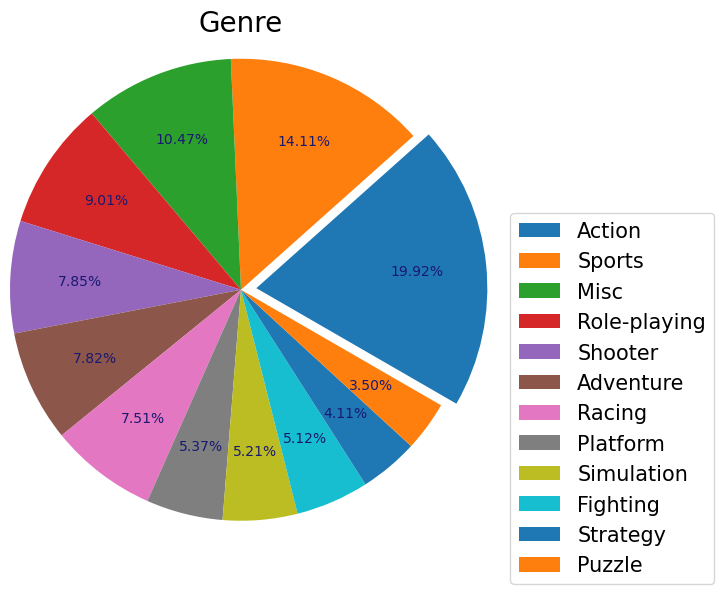

In [128]:
plt.figure(figsize = (5,5))
# colors = ['salmon', 'lemonchiffon', 'lightskyblue']
plt.pie(df['Genre'].value_counts(), explode = (0.1,0,0,0,0,0,0,0,0,0,0,0),
        textprops = {'fontsize':10,'color':'midnightblue'},
        radius = 1.5, autopct = '%.2f%%', pctdistance = 0.7, startangle = -30)
plt.legend(df['Genre'].value_counts().index.str.capitalize(), fontsize = 15,
           loc = 2, bbox_to_anchor = (1.2,0.7),borderaxespad = 0.)
plt.title("Genre", y = 1.15, fontsize = 20)
plt.show()

Nhận xét:
- Thể loại game có tỷ lệ khá cân đối, tuy nhiên thể loại game chiếm tỷ lệ lớn nhất là Game hành động (Action), và thể thao (Sports).
- Thể loại game hành động và thể thao thường có cách chơi đơn giản và dễ tiếp cận, không đòi hỏi người chơi phải có kiến thức chuyên sâu về quy tắc hoặc chiến lược phức tạp. Điều này thu hút đa dạng đối tượng người chơi, bao gồm cả những người chơi mới bắt đầu.

#### c) The quantity rate of video games by Publisher Group

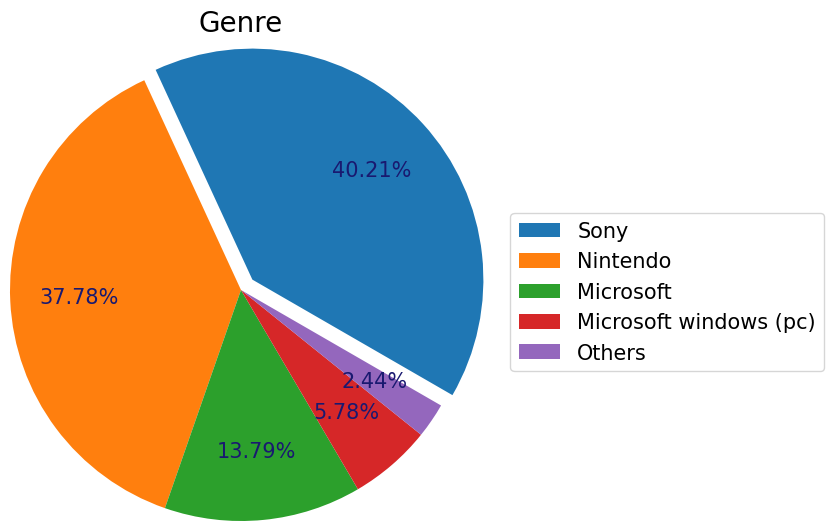

In [129]:
plt.figure(figsize = (5,5))
# colors = ['salmon', 'lemonchiffon', 'lightskyblue']
plt.pie(df['Publisher Group'].value_counts(), explode = (0.1,0,0,0,0),
        textprops = {'fontsize':15,'color':'midnightblue'},
        radius = 1.5, autopct = '%.2f%%', pctdistance = 0.7, startangle = -30)
plt.legend(df['Publisher Group'].value_counts().index.str.capitalize(), fontsize = 15,
           loc = 2, bbox_to_anchor = (1.2,0.7),borderaxespad = 0.)
plt.title("Genre", y = 1.15, fontsize = 20)
plt.show()

Nhận xét: Sự phân bổ số lượng game trên mỗi hệ máy thể hiện sự chênh lệch đáng kể. Trong ngành công nghiệp game, có ba ông lớn chiếm ưu thế. 
- Đầu tiên là Sony với tỷ lệ chiếm 40.21%, nổi bật với dòng sản phẩm PlayStation. 
- Tiếp theo là Nintendo chiếm 37.78% thị phần, với các dòng sản phẩm như Game Boy, Nintendo Wii, và đặc biệt là Nintendo Switch. 
- Cuối cùng, Microsoft chiếm 13.79% thị phần với sản phẩm nổi bật là Xbox 360.

### 2. Analyze data on video games quantities over years
#### a) Video game quantities by game console category

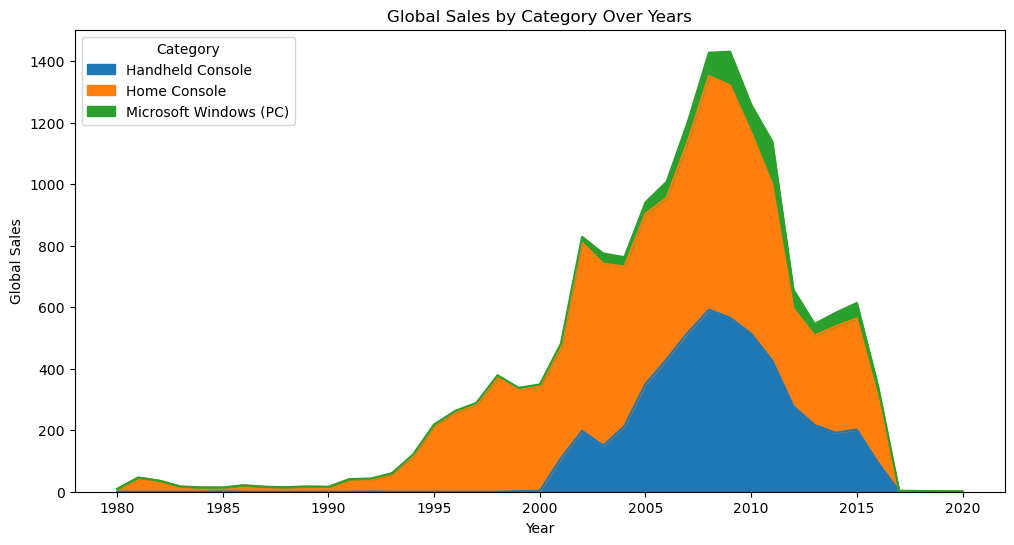

In [130]:
df_plot = df[['Year', 'Category']].join(df['Rank'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Category']).count().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Category', loc = 'upper left')
plt.show()

#### b) Video game quantities by Genre

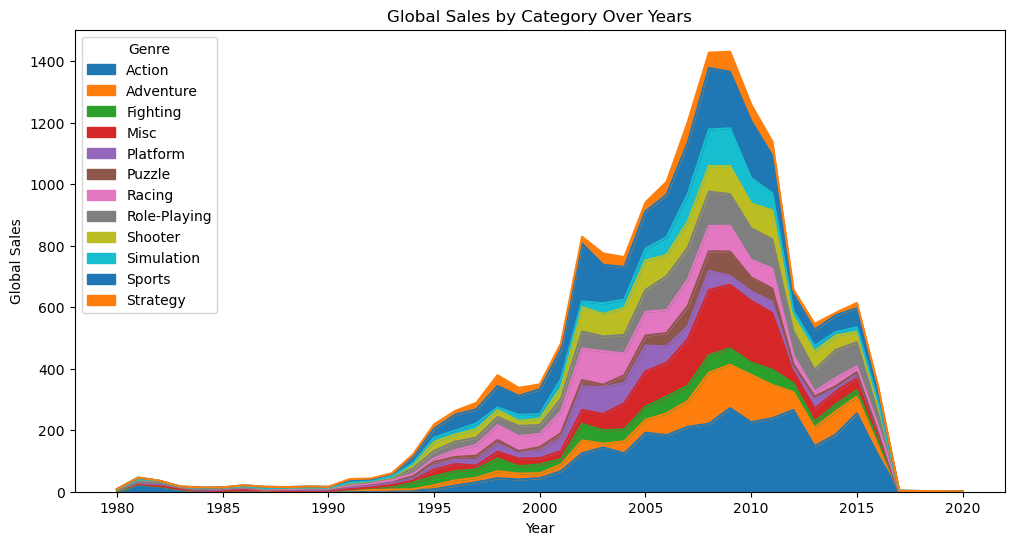

In [131]:
df_plot = df[['Year', 'Genre']].join(df['Rank'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Genre']).count().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Genre', loc = 'upper left')
plt.show()

#### c) Video game quantities by Publisher Group

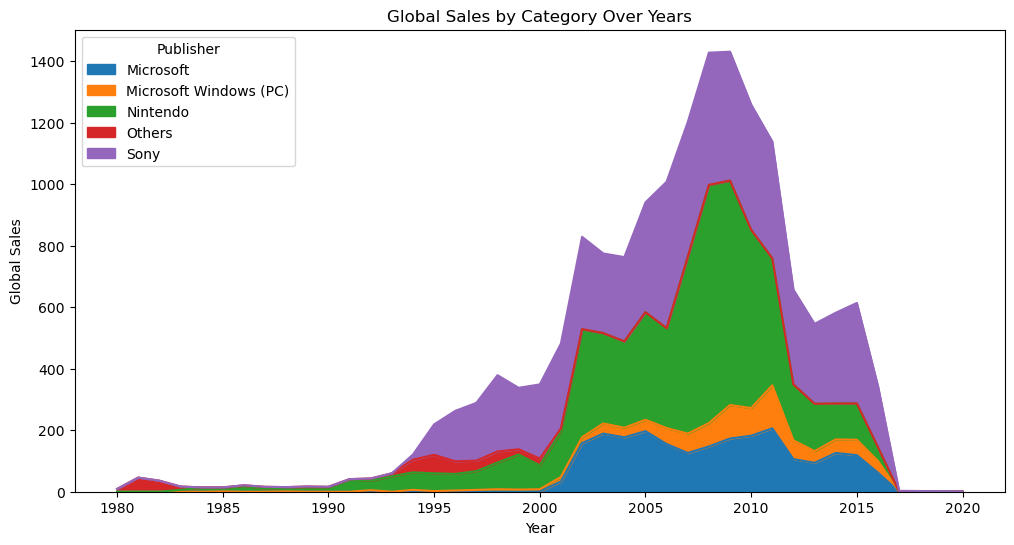

In [132]:
df_plot = df[['Year', 'Publisher Group']].join(df['Rank'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Publisher Group']).count().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Publisher', loc = 'upper left')
plt.show()

Nhận xét:
- Từ xu hướng trên, có thể thấy số lượng game mới phát hành đã tăng mạnh từ đầu thập niên 2000 đến đầu năm 2010, sau đó giảm đáng kể ở cả ba tiêu chí, bao gồm loại máy chơi game, thể loại game, cũng như số lượng game trên mỗi nền tảng phát hành. Đáng chú ý nhát là trong khoảng thời gian từ năm 2016 đến năm 2020, gần như không có tựa game mới nào được phát hành.

- Nguyên nhân cho sự tăng đột biến về số lượng game vào đầu thập niên 2000 là do sự ra đời của nhiều loại máy chơi game mới từ ba ông lớn trong ngành công nghiệp game. Một số mẫu điển hình như PlayStation 2 (năm 2000), Nintendo DS (năm 2004), Nintendo Wii (năm 2005), Xbox 360 (năm 2005), và PlayStation 3 (năm 2006). Điều này đã thúc đẩy các nhà phát triển game tạo ra nhiều tựa game mới trên các nền tảng này nhằm tăng doanh số bán hàng.

- Lý giải về việc số lượng game từ sau thập niên 2010 không tăng mà còn có xu hướng giảm mạnh là do sự phát triển của điện thoại thông minh. Đây là một trong những yếu tố lớn nhất ảnh hưởng đến việc phát hành trò chơi điện tử, vì vậy các nhà phát hành game đã chuyển hướng phát hành nhiều tựa game mới trên nền tảng điện thoại thông minh nhiều hơn, vì chúng có tính di động, nhỏ gọn và có nhiều người sở hữu.

### 3. Video Game Sales Data Analysis over the Year
#### a) Video Game Sales by Region

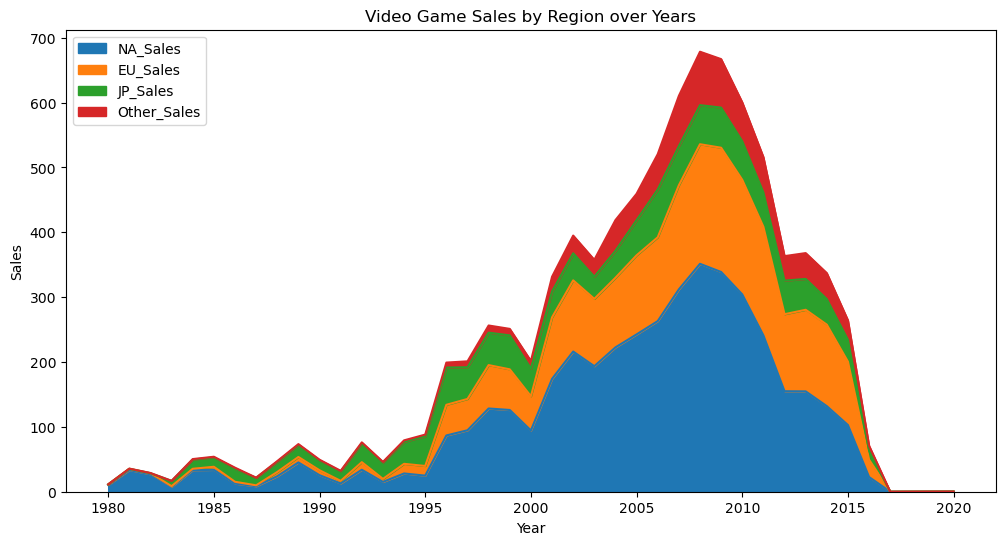

In [133]:
df_plot = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby('Year').sum()

# Tạo biểu đồ stacked area chart
df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

# Thiết lập tiêu đề và nhãn trục
plt.title('Video Game Sales by Region over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc = 'upper left')
plt.show()

#### b) Video Game Sales by Game Console Category

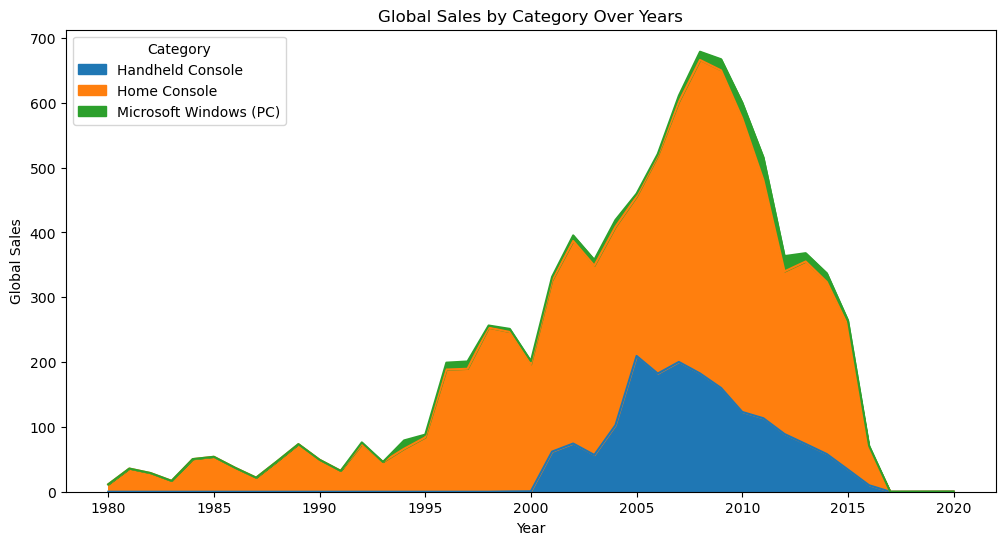

In [134]:
df_plot = df[['Year', 'Category']].join(df['Global_Sales'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Category']).sum().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Category', loc = 'upper left')
plt.show()

#### c) Video Game Sales by Genre

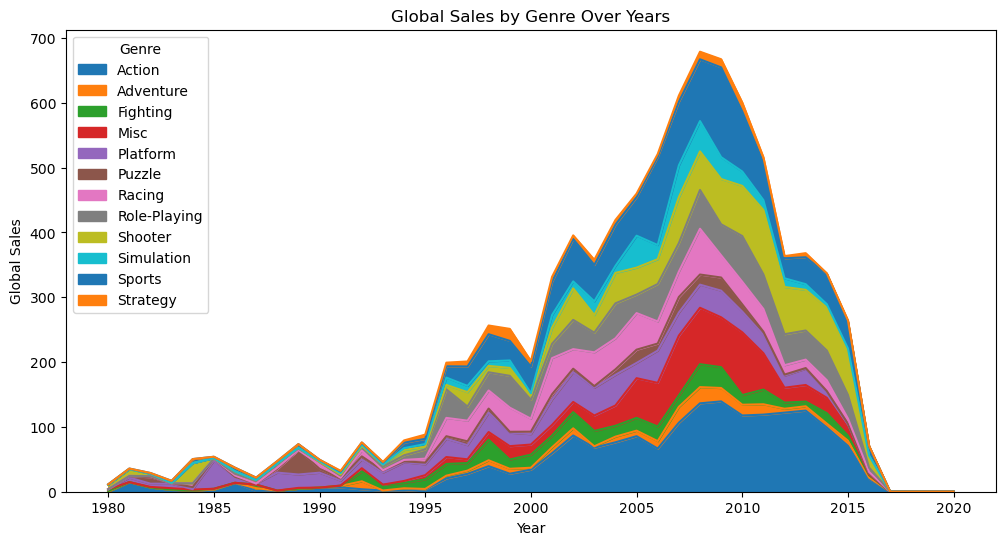

In [135]:
df_plot = df[['Year', 'Genre']].join(df['Global_Sales'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Genre']).sum().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Genre', loc = 'upper left')
plt.show()

#### d) Video Game Sales by Publisher Group

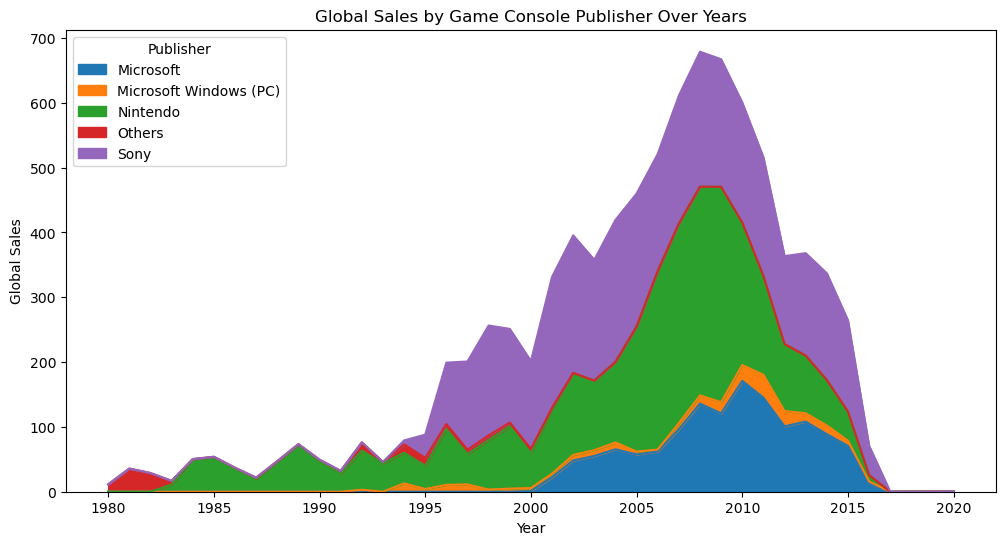

In [136]:
df_plot = df[['Year', 'Publisher Group']].join(df['Global_Sales'].apply(pd.to_numeric))

# Gom nhóm theo năm và tính tổng
df_grouped = df_plot.groupby(['Year', 'Publisher Group']).sum().unstack()

# Loại bỏ một cấp độ trong MultiIndex
df_grouped.columns = df_grouped.columns.droplevel()

df_grouped.plot(kind = 'area', stacked = True, figsize = (12, 6))

plt.title('Global Sales by Game Console Publisher Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title = 'Publisher', loc = 'upper left')
plt.show()

Nhận xét:

- Doanh thu từ game trong khoảng thời gian từ năm 2015 trở về trước chủ yếu phụ thuộc vào giá bán của các tựa game. Với việc số lượng game tạo ra giảm mạnh kể từ sau thập niên 2010, cộng với sự dịch chuyển của các nhà phát triển game sang việc tạo game trên nền tảng điện thoại di động, doanh thu do đó cũng giảm tỷ lệ thuận với số lượng game được sản xuất (hoặc chính xác hơn là số lượng game được bán ra).

### 4. Video Game Sales Data Analysis
#### a) Video Game Sales by Category

In [137]:
Sales_by_Category = df.pivot_table(index='Category', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc='sum')
Sales_by_Category

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Category,,,,
Handheld Console,410.39,417.12,773.87,130.38
Home Console,1861.09,867.01,3467.46,634.30
Microsoft Windows (PC),137.64,0.17,92.10,24.33


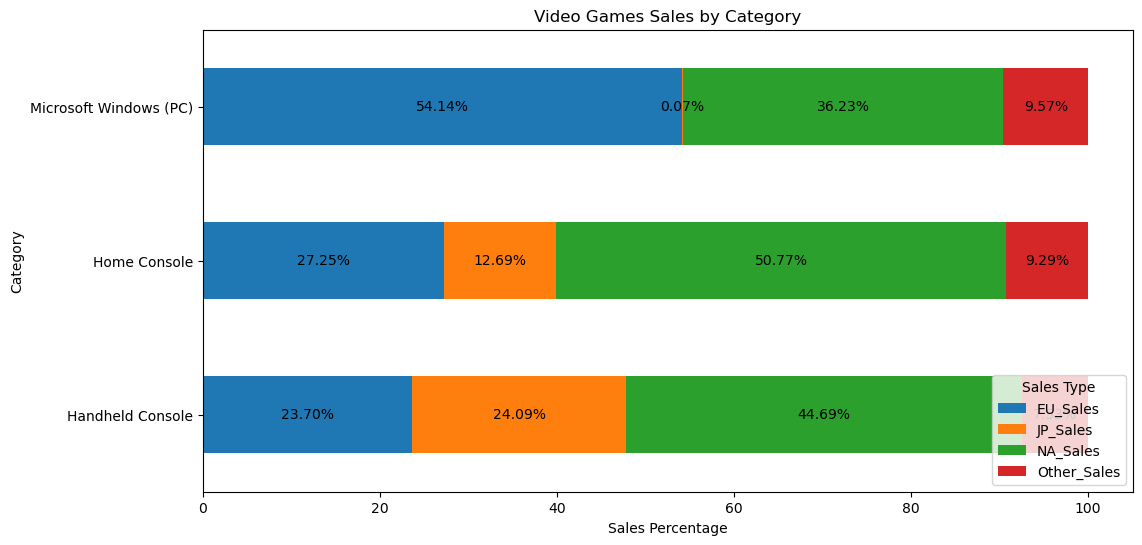

In [138]:
Sales_by_Category['Total_Sales'] = Sales_by_Category.sum(axis=1)

# Chuyển đổi thành tỷ lệ phần trăm
Sales_by_Category_percentage = Sales_by_Category.div(Sales_by_Category['Total_Sales'], axis=0) * 100

# Vẽ biểu đồ 100% Stacked Bar Chart
ax = Sales_by_Category_percentage.drop('Total_Sales', axis=1).plot(kind='barh', stacked=True, figsize=(12, 6))

plt.title('Video Games Sales by Category')
plt.ylabel('Category')
plt.xlabel('Sales Percentage')
plt.legend(title='Sales Type', loc='lower right')

# Thêm nhãn phần trăm lên thanh bar
for index, value in enumerate(Sales_by_Category_percentage.drop('Total_Sales', axis=1).values):
    total = 0
    for i in value:
        ax.text(total + i / 2, index, f'{i:.2f}%', ha='center', va='center')
        total += i

plt.show()

#### b) Video Game Sales by Genre

In [139]:
Sales_by_Genre = df.pivot_table(index='Genre', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc='sum')
Sales_by_Genre

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,
Action,516.48,158.66,861.80,184.92
Adventure,63.79,52.01,102.06,16.70
Fighting,100.00,87.15,220.74,36.19
Misc,213.82,106.67,402.48,74.02
Platform,200.67,130.65,445.99,51.51
Puzzle,50.53,56.68,122.01,12.47
Racing,236.32,56.61,356.93,76.68
Role-Playing,187.58,350.29,326.50,59.38
Shooter,310.45,38.18,575.16,101.90


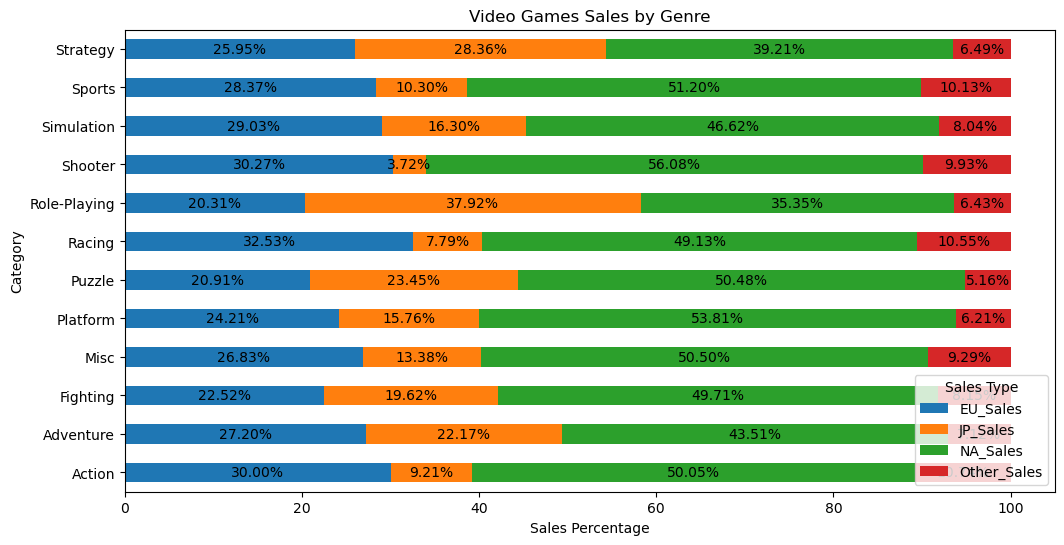

In [140]:
Sales_by_Genre['Total_Sales'] = Sales_by_Genre.sum(axis=1)

# Chuyển đổi thành tỷ lệ phần trăm
Sales_by_Genre_percentage = Sales_by_Genre.div(Sales_by_Genre['Total_Sales'], axis=0) * 100

# Vẽ biểu đồ 100% Stacked Bar Chart
ax = Sales_by_Genre_percentage.drop('Total_Sales', axis=1).plot(kind='barh', stacked=True, figsize=(12, 6))

plt.title('Video Games Sales by Genre')
plt.ylabel('Category')
plt.xlabel('Sales Percentage')
plt.legend(title='Sales Type', loc='lower right')

# Thêm nhãn phần trăm lên thanh bar
for index, value in enumerate(Sales_by_Genre_percentage.drop('Total_Sales', axis=1).values):
    total = 0
    for i in value:
        ax.text(total + i / 2, index, f'{i:.2f}%', ha='center', va='center')
        total += i

plt.show()

Nhận xét:
- NA, EU và JP đứng đầu với tỷ lệ doanh thu cao nhất trong lĩnh vực Game Console và Thể loại game. Trong đó, Bắc Mỹ (NA) chiếm ưu thế với tỷ lệ 49.13%, theo sau là Châu Âu (EU) với 27.32% và Nhật Bản (JP) với 14.56%. Điều này chỉ ra rằng ba thị trường này luôn là điểm đến hứa hẹn cho các nhà phát triển game.

### 5. Compare the video games sales of Top Publishers
#### a) Top 25 games with the highest Global Sales

In [141]:
sorted_df = df.sort_values('Global_Sales', ascending=False)
top_25_records = sorted_df.head(25)

selected_columns = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Publisher Group',
                    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

top_25_records[selected_columns]

,Name,Platform,Year,Genre,Publisher,Publisher Group,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,Nintendo,26.93,0.63,0.28,0.47,28.31


#### b) Global Sales by Publishers

In [142]:
# Number of Publishers
count_publisher = df['Publisher'].nunique()
count_publisher

576

In [143]:
Global_Sales_by_Publisher = df.groupby('Publisher')['Global_Sales'].sum()
Global_Sales_by_Publisher = Global_Sales_by_Publisher.sort_values(ascending = False)

Top_10_Publisher = Global_Sales_by_Publisher.head(10)
Top_10_Publisher

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Take-Two Interactive            399.30
THQ                             340.44
Konami Digital Entertainment    278.56
Sega                            270.70
Namco Bandai Games              253.65
Name: Global_Sales, dtype: float64

In [144]:
# Sales of Top 10 Publishers
total_sales_top_10 = Top_10_Publisher.sum()

# Sales of All Publishers
total_sales_all_publisher = Global_Sales_by_Publisher.sum()

# Ratio
Ratio = (total_sales_top_10/total_sales_all_publisher)*100
Ratio

70.61644558481247

In [145]:
# Sales rate of Top 10 Publisher
ratio = (Top_10_Publisher/total_sales_all_publisher)*100
ratio

Publisher
Nintendo                       20.25
Electronic Arts                12.41
Activision                      8.19
Sony Computer Entertainment     6.89
Ubisoft                         5.37
Take-Two Interactive            4.53
THQ                             3.86
Konami Digital Entertainment    3.16
Sega                            3.07
Namco Bandai Games              2.88
Name: Global_Sales, dtype: float64

Nhận xét:
- Với các kết quả tính toán cơ bản ở trên, có thể thấy rằng doanh thu của Top 10 nhà phát hành game chiếm tỷ lệ rất lớn khoảng **70.62%** --> 566 (tỷ lệ 98.87%) nhà phát hành game còn lại có tổng doanh thu chỉ chiếm gần **30%** !!!

- Đối với top 3 nhà phát hành game gồm có Nintendo, Electronic Arts và Activision:
    - **Nintendo** có doanh số bán game lớn nhất với khoảng **1.784 tỷ Dolars** chiếm tỷ lệ **20.25%**. Điều này là do Nintendo có những trò chơi siêu nổi tiếng như **Super Mario Bros**, **Mario Kart**, **The Legend of Zelda** hay **Pokémon**.
    - Với nhà phát hành **Electronic Arts (EA)**, doanh thu của họ chủ yếu đến từ loạt game FIFA, Sims hay Battlefield, ... với tổng doanh thu đạt khoảng 1.094 tỷ dolars chiếm tỷ lệ **12.41%**.
    - Doanh thu của **Activision**, đạt **721.41 triệu dolars**, chiếm tỷ lệ **8.19%**, chủ yếu đến từ chuỗi game Call of Duty - Tựa game bắn súng phát hành tựa game đầu tiên phát hành vào năm 2005.

---
## V. Insights and Solutions
### 1. Insights

- Xu hướng phát triển game trong những năm gần đây có nhiều yếu tố tác động. Trong đó, ảnh hướng lớn nhất chủ yếu đến từ sự phát triển của công nghệ cũng như sự ra đời của điện thoại di động từ thập niên 2010.
- Doanh thu **tỷ lệ thuận** với số lượng game phát hành trong mỗi năm. 
- Doanh thu của các nhà phát triển game chủ yếu đến từ thị trường **Bắc Mỹ và Châu Âu** với tỷ lệ chiếm **76.45%** trên tổng doanh thu toàn cầu.
- Doanh thu đến từ Top 3 nhà phát triển game chiếm tỷ lệ **40.84%** tổng doanh thu, 573 (tỷ lệ 99.47%) nhà phát hành game còn lại có tổng doanh thu chỉ chiếm gần **59.16%**.
- Từ biểu đồ mô tả số lượng games phát hành theo năm, có thể phân loại xu hướng phát triển game theo 3 thời kỳ sau:
    - Giai đoạn 1980-2000: Đây là thời kỳ các hệ máy chơi game gia đình như NES, Sega Genesis, và Sony PlayStation bắt đầu thống trị thị trường. Các tựa game ấn tượng như Super Mario Bros, The Legend of Zelda, và Final Fantasy ra đời trong giai đoạn này.

    - Giai đoạn 2000-2010: Giai đoạn này chứng kiến sự phổ biến của trò chơi 3D và trải nghiệm trực tuyến. Các hệ máy như PlayStation 2, Xbox, và Nintendo Wii đã mở ra một thế hệ mới với đồ họa 3D sống động và khả năng kết nối mạng. Điều này đã thúc đẩy các nhà phát triển game tạo ra nhiều tựa game mới trên các nền tảng này nhằm tăng doanh số bán hàng.

    - Giai đoạn 2010-nay: Trong giai đoạn này, sự phát triển của thiết bị di động đã thúc đẩy sự bùng nổ của trò chơi di động và game trực tuyến --> Xuất hiện sự dịch chuyển của các nhà phát triển game sang việc tạo game trên nền tảng điện thoại di động.

### 2. Solutions

- Tăng doanh số bán hàng:
    - Các nhà phát triển cần sử dụng chiến lược tiếp thị hiệu quả để đưa sản phẩm đến với đúng đối tượng khách hàng. Kết hợp các chiến dịch quảng cáo trực tuyến, kế hoạch truyền thông xã hội, cùng với việc tổ chức sự kiện trực tiếp sẽ nâng cao hiệu quả tiếp thị và đẩy mạnh doanh số bán hàng.
    - Để tối ưu hóa doanh số bán, việc nắm bắt chặt chẽ xu hướng thị trường và sự biến đổi trong sở thích của người chơi là vô cùng quan trọng. Điều này yêu cầu sự hiểu biết chính xác về đối tượng khách hàng, từ đó phát triển những sản phẩm chất lượng cao, đáp ứng đầy đủ mong đợi và kỳ vọng của người chơi.
    
- Phát triển sản phẩm trên hệ máy chơi game mới:
    - Các nghiên cứu cũng chỉ ra rằng doanh số bán thường tăng sau 1-2 năm kể từ khi phát hành máy chơi game mới, vậy nên các nhà phát triển cần nghiên cứu nền tảng trước khi tạo ra sản phẩm mới, đảm bảo rằng sản phẩm không chỉ tận dụng được sức mạnh của hệ máy mới mà còn tạo ra sự đột phá và tương tác, tạo ra trải nghiệm chơi game độc đáo nhằm thu hút thêm mới lượng người chơi.